In [1]:
import pandas as pd
import numpy as np

In [2]:
busstop = ['02003', '02006', '02282']

In [ ]:
df = pd.read_csv("../busdata/bus_201501.csv", encoding='cp949')

In [39]:
df.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20150101,100,100번(하계동~용산구청),11374,서울시립북서울미술관,22,2,20151228
1,20150101,6631,6631번(강서공영차고지~영등포역),~,당산동진로아파트,32,32,20151228
2,20150101,105,105번(상계동~서울역),11416,하계역,65,199,20151228
3,20150101,6631,6631번(강서공영차고지~영등포역),~,건양병원.김안과병원,143,28,20151228
4,20150101,102,102번(상계동~동대문),10249,KEB하나은행창동지점,181,171,20151228


In [43]:
temp = df[df['버스정류장ARS번호'].isin(busstop)]
temp.head(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
20,20150101,03,03번(남산서울타워~남산서울타워),02282,서울스퀘어앞,126,580,20151228
6349,20150101,1711,1711번(국민대~공덕동),02003,서울역버스환승센터,97,415,20151228
13956,20150101,702B,"702번(B,용두초교방향,서오릉~종로1가)",02006,서울역버스환승센터,358,52,20151228
14760,20150101,702A,"702번(A,서오릉방향,서오릉~종로1가)",02006,서울역버스환승센터,655,101,20151228
16469,20150101,706,706번(교하차고지~서울역),02003,서울역버스환승센터,220,304,20151228
16850,20150101,701,701번(구파발~종로1가),02006,서울역버스환승센터,347,55,20151228
20568,20150101,603,603번(신월동~시청),02006,서울역버스환승센터,301,131,20151228
25007,20150101,703,703번(문산선유리~서울역환승센터),02006,서울역버스환승센터,881,328,20151228
29606,20150101,503,503번(광명공영차고지~서울역),02006,서울역버스환승센터,20,84,20151228
33975,20150101,7021,7021번(은평공영차고지~롯데백화점),02006,서울역버스환승센터,89,482,20151228


In [46]:
temp['총승객수'] = temp['승차총승객수'] + temp['하차총승객수']

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_33984/408625399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['총승객수'] = temp['승차총승객수'] + temp['하차총승객수']


In [50]:
temp = temp.groupby(['사용일자', '버스정류장ARS번호'])['총승객수'].sum()

In [ ]:
pd.DataFrame(temp)

In [ ]:
import os
import pandas as pd

# 폴더 경로 설정
input_folder = "../busdata/"
output_folder = "../busdata_utf8/"

# 출력 폴더 생성 (없으면 생성)
os.makedirs(output_folder, exist_ok=True)

# 파일 목록 가져오기
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# 모든 파일을 UTF-8로 변환
for file_name in file_list:
    input_path = os.path.join(input_folder, file_name)
    output_path = os.path.join(output_folder, file_name)
    
    try:
        # 파일 읽기 (원본 인코딩은 cp949로 가정)
        df = pd.read_csv(input_path, encoding='cp949')
        
        # UTF-8로 파일 저장
        df.to_csv(output_path, encoding='utf-8', index=False)
        
        print(f"Converted {file_name} to UTF-8")
    except Exception as e:
        print(f"Failed to process {file_name}: {e}")

In [14]:
import pandas as pd

In [15]:
# 빈 데이터프레임 초기화
result = pd.DataFrame()
busstop = ['02003', '02006', '02282']

# 데이터를 처리하는 함수
def set_new_dataframe(moment):
    # 파일 경로 생성
    route = '../busdata/bus_' + moment + '.csv'
    print(route)
    # 데이터 읽기
    df = pd.read_csv(route, encoding='utf-8')

    # 필요한 데이터 필터링 및 계산
    temp = df[df['버스정류장ARS번호'].isin(busstop)].copy()  # 명시적으로 복사
    temp['총승객수'] = temp['승차총승객수'] + temp['하차총승객수']
    temp = temp.groupby(['사용일자', '버스정류장ARS번호'])[['총승객수', '승차총승객수', '하차총승객수']].sum()

    # 데이터프레임 반환
    return pd.DataFrame(temp)

# 연-월 리스트 생성
year_month_list = [f"{year}{month:02d}" for year in range(2015, 2025) for month in range(1, 13) if not (year == 2024 and month > 10)]

# 반복문으로 파일 처리 및 병합
for moment in year_month_list:
    newdf = set_new_dataframe(moment)
    result = pd.concat([result, newdf], axis=0)

../busdata/bus_201501.csv
../busdata/bus_201502.csv
../busdata/bus_201503.csv
../busdata/bus_201504.csv
../busdata/bus_201505.csv
../busdata/bus_201506.csv
../busdata/bus_201507.csv
../busdata/bus_201508.csv
../busdata/bus_201509.csv
../busdata/bus_201510.csv
../busdata/bus_201511.csv
../busdata/bus_201512.csv
../busdata/bus_201601.csv
../busdata/bus_201602.csv
../busdata/bus_201603.csv
../busdata/bus_201604.csv
../busdata/bus_201605.csv
../busdata/bus_201606.csv
../busdata/bus_201607.csv
../busdata/bus_201608.csv
../busdata/bus_201609.csv
../busdata/bus_201610.csv
../busdata/bus_201611.csv
../busdata/bus_201612.csv
../busdata/bus_201701.csv
../busdata/bus_201702.csv
../busdata/bus_201703.csv
../busdata/bus_201704.csv
../busdata/bus_201705.csv
../busdata/bus_201706.csv
../busdata/bus_201707.csv
../busdata/bus_201708.csv
../busdata/bus_201709.csv
../busdata/bus_201710.csv
../busdata/bus_201711.csv
../busdata/bus_201712.csv


/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_84966/3875820229.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(route, encoding='utf-8')


../busdata/bus_201801.csv
../busdata/bus_201802.csv
../busdata/bus_201803.csv
../busdata/bus_201804.csv
../busdata/bus_201805.csv
../busdata/bus_201806.csv
../busdata/bus_201807.csv
../busdata/bus_201808.csv
../busdata/bus_201809.csv
../busdata/bus_201810.csv
../busdata/bus_201811.csv
../busdata/bus_201812.csv
../busdata/bus_201901.csv
../busdata/bus_201902.csv
../busdata/bus_201903.csv
../busdata/bus_201904.csv
../busdata/bus_201905.csv
../busdata/bus_201906.csv
../busdata/bus_201907.csv
../busdata/bus_201908.csv
../busdata/bus_201909.csv
../busdata/bus_201910.csv
../busdata/bus_201911.csv
../busdata/bus_201912.csv
../busdata/bus_202001.csv
../busdata/bus_202002.csv
../busdata/bus_202003.csv
../busdata/bus_202004.csv
../busdata/bus_202005.csv
../busdata/bus_202006.csv


/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_84966/3875820229.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(route, encoding='utf-8')


../busdata/bus_202007.csv
../busdata/bus_202008.csv
../busdata/bus_202009.csv
../busdata/bus_202010.csv
../busdata/bus_202011.csv
../busdata/bus_202012.csv
../busdata/bus_202101.csv
../busdata/bus_202102.csv
../busdata/bus_202103.csv
../busdata/bus_202104.csv
../busdata/bus_202105.csv
../busdata/bus_202106.csv
../busdata/bus_202107.csv
../busdata/bus_202108.csv
../busdata/bus_202109.csv
../busdata/bus_202110.csv
../busdata/bus_202111.csv
../busdata/bus_202112.csv
../busdata/bus_202201.csv
../busdata/bus_202202.csv
../busdata/bus_202203.csv
../busdata/bus_202204.csv
../busdata/bus_202205.csv
../busdata/bus_202206.csv
../busdata/bus_202207.csv
../busdata/bus_202208.csv
../busdata/bus_202209.csv
../busdata/bus_202210.csv
../busdata/bus_202211.csv
../busdata/bus_202212.csv
../busdata/bus_202301.csv
../busdata/bus_202302.csv
../busdata/bus_202303.csv
../busdata/bus_202304.csv
../busdata/bus_202305.csv
../busdata/bus_202306.csv
../busdata/bus_202307.csv
../busdata/bus_202308.csv
../busdata/b

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_84966/3875820229.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(route, encoding='utf-8')


../busdata/bus_202401.csv


/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_84966/3875820229.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(route, encoding='utf-8')


../busdata/bus_202402.csv
../busdata/bus_202403.csv
../busdata/bus_202404.csv
../busdata/bus_202405.csv
../busdata/bus_202406.csv
../busdata/bus_202407.csv
../busdata/bus_202408.csv
../busdata/bus_202409.csv
../busdata/bus_202410.csv


In [16]:
result.head(10)

총승객수  승차총승객수  하차총승객수
사용일자     버스정류장ARS번호                        
20150101 02003       1036.0   317.0   719.0
         02006       4239.0  2802.0  1437.0
         02282        706.0   126.0   580.0
20150102 02003       1920.0   507.0  1413.0
         02006       7239.0  4557.0  2682.0
         02282        246.0    43.0   203.0
20150103 02003       1507.0   410.0  1097.0
         02006       5746.0  3674.0  2072.0
         02282        464.0   110.0   354.0
20150104 02003       1329.0   388.0   941.0

In [17]:
result.to_csv("./dataProcessed/busstop.csv", encoding='utf-8')

In [18]:
import pandas as pd

df = pd.read_csv("../busdata/bus_202005.csv")
busstop = ['02003', '02006', '02282']

temp.head(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
20200501,603,603번(신월동~시청),101000006,02006,서울역버스환승센터,260,113,20200504
20200501,173,173번(월계동~연세대),101000006,02006,서울역버스환승센터,65,184,20200504
20200501,7016,7016번(은평차고지~상명대),101000003,02003,서울역버스환승센터,109,229,20200504
20200501,7017,7017번(은평공영차고지~롯데백화점),101000006,02006,서울역버스환승센터,33,324,20200504
20200501,7021,7021번(은평공영차고지~롯데백화점),101000006,02006,서울역버스환승센터,59,567,20200504
20200501,507,507번(석수역~동대문문화공원),101000263,02282,서울스퀘어앞,18,104,20200504
20200501,702B,"702번(B,용두초교방향,서오릉~종로1가)",101000006,02006,서울역버스환승센터,337,42,20200504
20200501,708,708번(진관차고지~서울역),101000006,02006,서울역버스환승센터,195,379,20200504
20200501,01A,01A번(서울역환승센터~서울역환승센터),101000006,02006,서울역버스환승센터,7,1,20200504
20200501,01A,01A번(서울역환승센터~서울역환승센터),101000006,02006,서울역버스환승센터,11,10,20200504


## 버스데이터 시각화

In [21]:
df = pd.read_csv("./dataProcessed/busstop.csv")

In [22]:
import platform
import matplotlib as mat

if platform.system() == 'Darwin':
    mat.rc('font', family='AppleGothic')
    mat.rcParams['axes.unicode_minus'] = False

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   탑승일자        10763 non-null  object 
 1   버스정류장ARS번호  10763 non-null  int64  
 2   총승객수        10763 non-null  float64
 3   승차총승객수      10763 non-null  float64
 4   하차총승객수      10763 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 420.6+ KB


In [24]:
import matplotlib.pyplot as plt
df1 = df[df['버스정류장ARS번호'] == 2003]
df2 = df[df['버스정류장ARS번호'] == 2006]
df3 = df[df['버스정류장ARS번호'] == 2282]

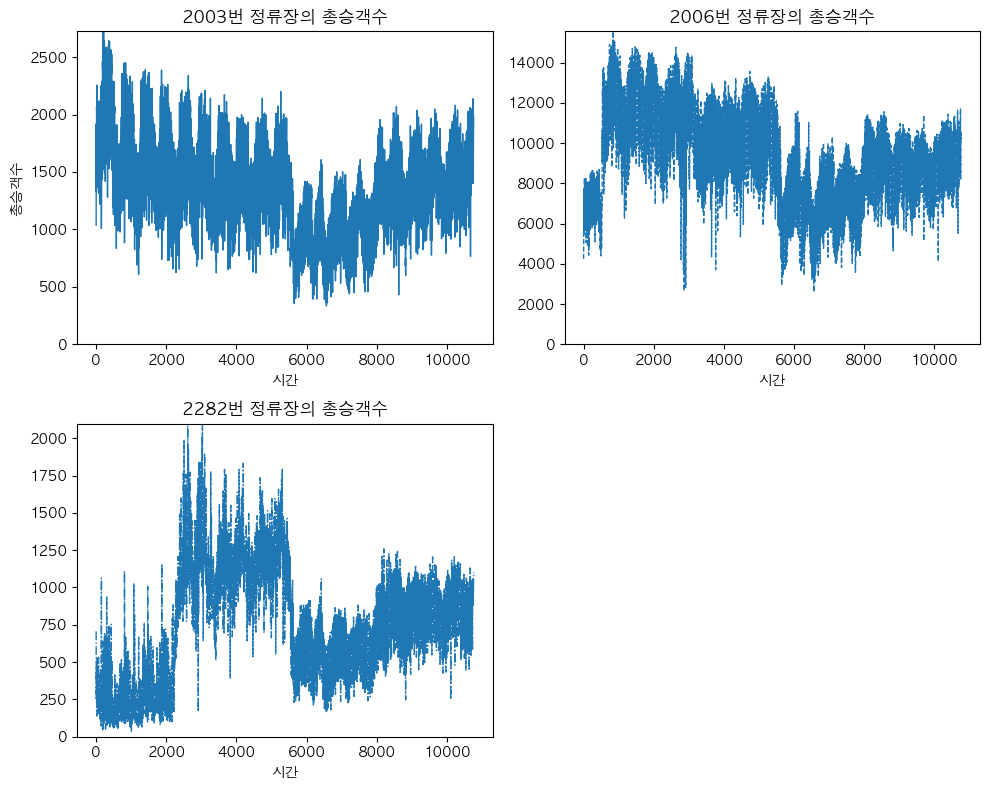

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # 전체 그래프 크기 조정

# 첫 번째 서브플롯
plt.subplot(2, 2, 1)
plt.title("2003번 정류장의 총승객수", fontsize=12)
plt.plot(df1['총승객수'], linestyle='-', linewidth=1)
plt.xlabel("시간", fontsize=10)
plt.ylabel("총승객수", fontsize=10)
plt.ylim(0, df1['총승객수'].max())  # y축 통일

# 두 번째 서브플롯
plt.subplot(2, 2, 2)
plt.title("2006번 정류장의 총승객수", fontsize=12)
plt.plot(df2['총승객수'], linestyle='--', linewidth=1)
plt.xlabel("시간", fontsize=10)
plt.ylim(0, df2['총승객수'].max())  # y축 통일

# 세 번째 서브플롯
plt.subplot(2, 2, 3)
plt.title("2282번 정류장의 총승객수", fontsize=12)
plt.plot(df3['총승객수'], linestyle='-.', linewidth=1)
plt.xlabel("시간", fontsize=10)
plt.ylim(0, df3['총승객수'].max())  # y축 통일

# 서브플롯 간 간격 조정
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.tight_layout()  # 간격 자동 조정
plt.show()